In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.17.1


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [5]:
dataset.head()
# we are going to find if the has exited this bank or not
# Exited is the dependent feature all other are the independent feature.

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Divide the dataset into independent and dependent features
X=dataset.iloc[:,3:13] # These are my independent features
Y=dataset.iloc[:,13] # This is my dependent feature

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
Y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [9]:
## Feature Engineering
geography=pd.get_dummies(X['Geography'], drop_first=True) # this is getting converted into one hot encoding
gender=pd.get_dummies(X['Gender'], drop_first=True)

## One-hot encoding is a technique used to convert categorical data into a numerical format that machine learning algorithms can process.

In [10]:
# concatenate these variables with dataframe
# 1st drop the existing features
X=X.drop(['Geography','Gender'], axis=1)

In [11]:
# Now concatenate tthe geograohy and gender

X=pd.concat([X,geography,gender], axis=1)

In [13]:
X = X.apply(pd.to_numeric, errors='coerce')

In [14]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [15]:
# Train test Split, Splitting the datset into training and testing dataset.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [16]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [17]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [18]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [19]:
X_train.shape

(8000, 11)

In [21]:
## PART 2, Now lets create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [22]:
## Lets initialise the ANN
classifier = Sequential()

In [23]:
## Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [47]:
# adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [26]:
# adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [27]:
# Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))


In [29]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [30]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
## Early stopping
# this will stop automatically if the accuracy is not changing
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [35]:
model_history=classifier.fit(X_train,Y_train,validation_split=0.333, batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8691 - loss: 0.3082 - val_accuracy: 0.8498 - val_loss: 0.3776
Epoch 2/1000
534/534 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8682 - loss: 0.3183 - val_accuracy: 0.8453 - val_loss: 0.3785
Epoch 3/1000
534/534 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8662 - loss: 0.3212 - val_accuracy: 0.8472 - val_loss: 0.4020
Epoch 4/1000
534/534 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8736 - loss: 0.3112 - val_accuracy: 0.8476 - val_loss: 0.3845
Epoch 5/1000
534/534 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8699 - loss: 0.3189 - val_accuracy: 0.8517 - val_loss: 0.4130
Epoch 6/1000
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8702 - loss: 0.3151 - val_accuracy: 0.8476 - val_loss: 0.3796
Epoch 7/1000
534/534 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8728 - loss: 0.3097 - val_accuracy: 0.8465 - val_loss: 0.4069
Epoch 8/1000
534/534 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8607 - loss: 0.3294 - 

In [36]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

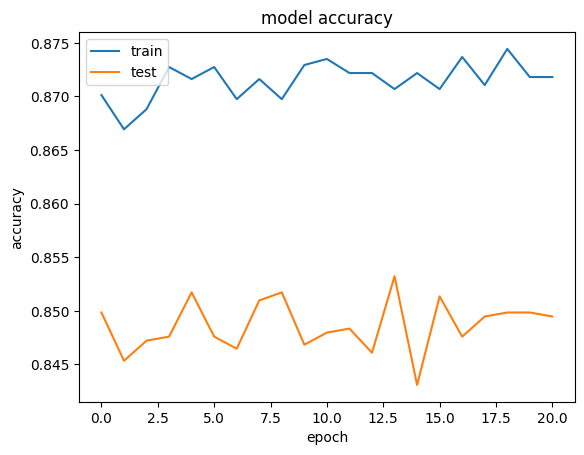

In [37]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

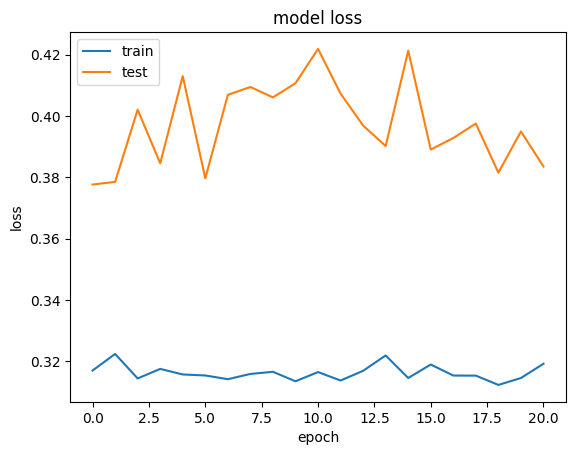

In [38]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [41]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[1535,   60],
       [ 210,  195]])

In [43]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,Y_test)

In [45]:
score

0.865

In [46]:
## get the weights
classifier.get_weights()

[array([[ 0.7362604 ,  0.01869538, -0.04650536,  0.3088394 , -2.6229627 ,
         -1.5308542 , -0.5036198 , -0.6932291 , -0.5568418 , -0.7726879 ,
         -0.24734305],
        [-2.5084176 , -1.5752143 , -3.9149842 ,  1.3687283 , -0.741019  ,
         -0.18298554, -0.37050867,  3.4410274 , -5.084369  ,  1.8224542 ,
         -0.04817122],
        [ 0.0250598 ,  1.3795848 ,  0.6476987 , -0.45521203, -1.2746303 ,
          0.946018  , -0.09780794,  0.6782926 ,  0.52554077,  0.5576045 ,
         -0.23391224],
        [ 0.05706868, -4.287084  ,  0.96003294,  3.0256147 ,  1.9177592 ,
         -2.8623683 ,  1.3303442 ,  0.10948512,  0.55401206, -0.8080969 ,
         -3.0311708 ],
        [ 1.4417136 ,  0.9082974 ,  0.05923329,  2.570317  ,  0.42160225,
         -1.1674218 ,  4.960377  ,  0.01756008, -0.7196539 , -4.9390554 ,
          1.9952552 ],
        [ 1.0963821 , -1.742203  , -0.56758827, -0.92853886,  0.29503295,
         -0.62983924, -0.16688237, -0.41335717,  0.75636715, -0.0805737